In [6]:
%matplotlib inline
import cv2
import numpy as np
import PIL
from IPython.display import display
from skimage.exposure import rescale_intensity


In [7]:
!wget -O skittles.jpg https://upload.wikimedia.org/wikipedia/commons/c/ca/Skittles-Louisiana-2003.jpg

--2022-05-01 22:22:22--  https://upload.wikimedia.org/wikipedia/commons/c/ca/Skittles-Louisiana-2003.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 785075 (767K) [image/jpeg]
Saving to: ‘skittles.jpg’

skittles.jpg        100%[===================>] 766.67K  --.-KB/s    in 0.1s    

2022-05-01 22:22:22 (5.56 MB/s) - ‘skittles.jpg’ saved [785075/785075]



In [8]:
def imshow(a):
  a = a.clip(0, 255).astype('uint8')
  if a.ndim == 3:
    if a.shape[2] == 4:
      a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
    else:
      a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
  display(PIL.Image.fromarray(a))

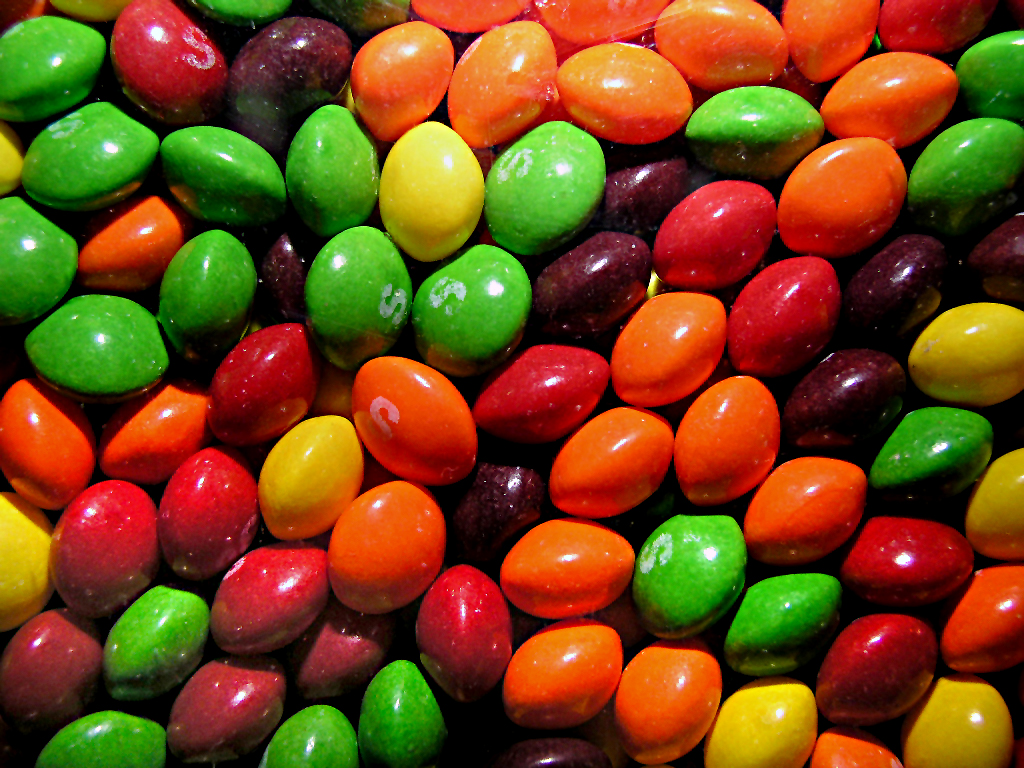

In [9]:
img = cv2.imread('./skittles.jpg', cv2.IMREAD_COLOR)
img_gs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow(img)

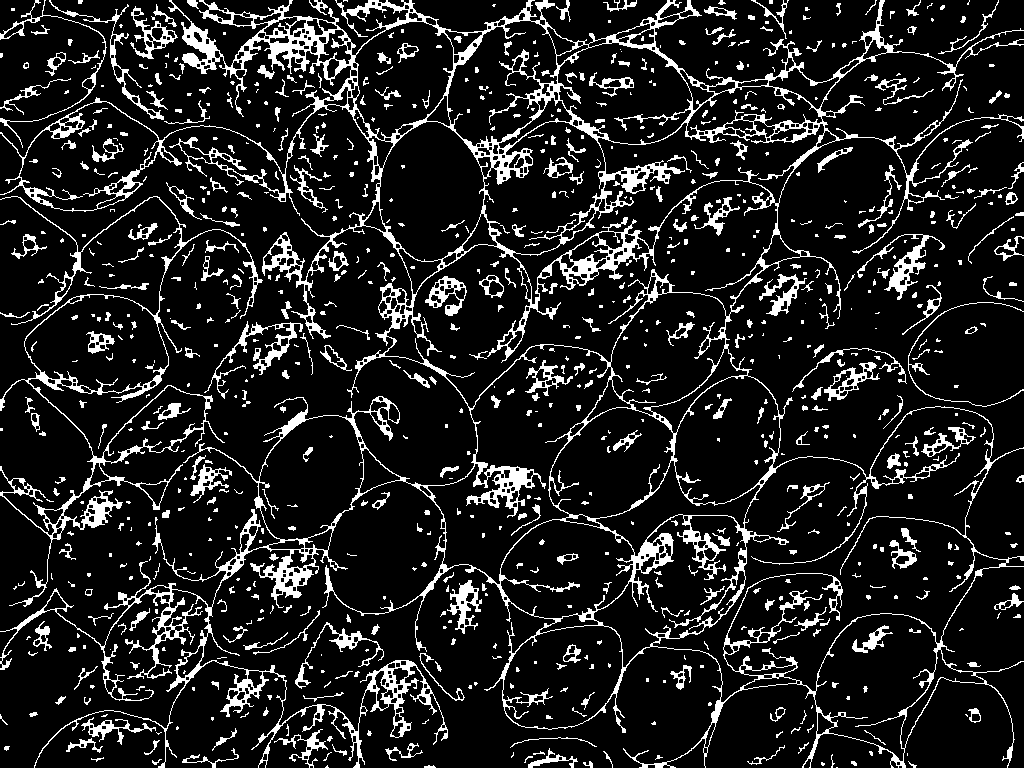

In [10]:

img_high, _ = cv2.threshold(img_gs, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
img_low = 0.5 * img_high
img_canny_t = cv2.Canny(img_gs, img_low, img_high, 9)
img_canny = cv2.morphologyEx(img_canny_t, cv2.MORPH_CLOSE, kernel = np.ones((3, 3),np.uint8))

imshow(img_canny)



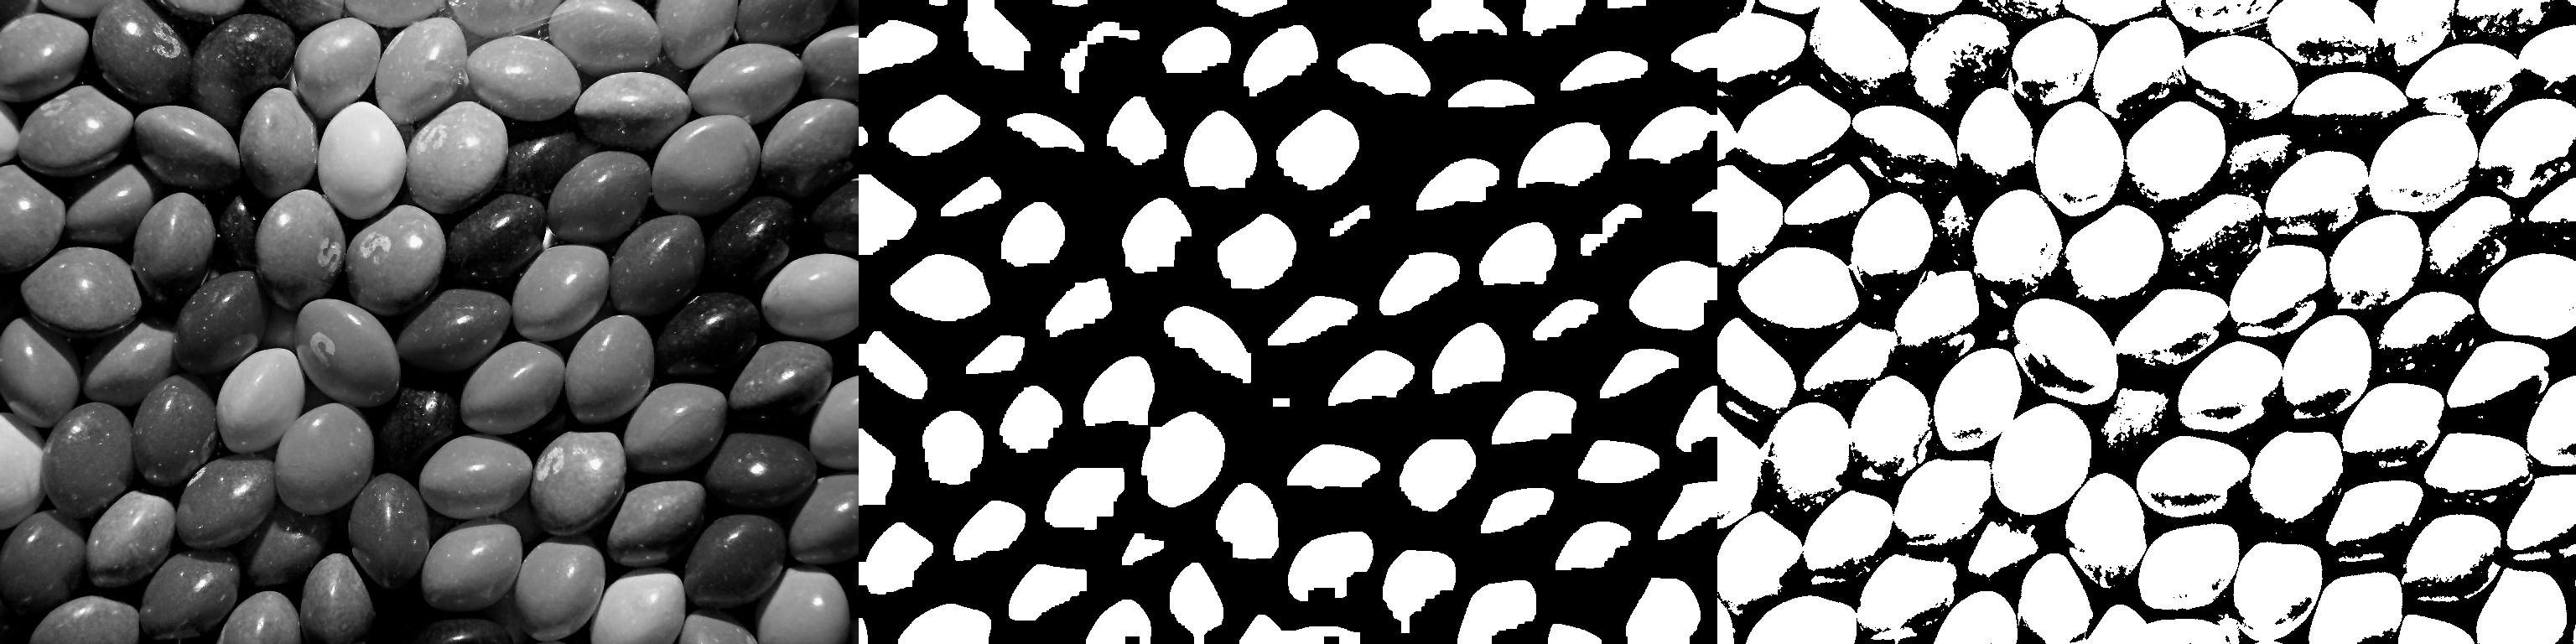

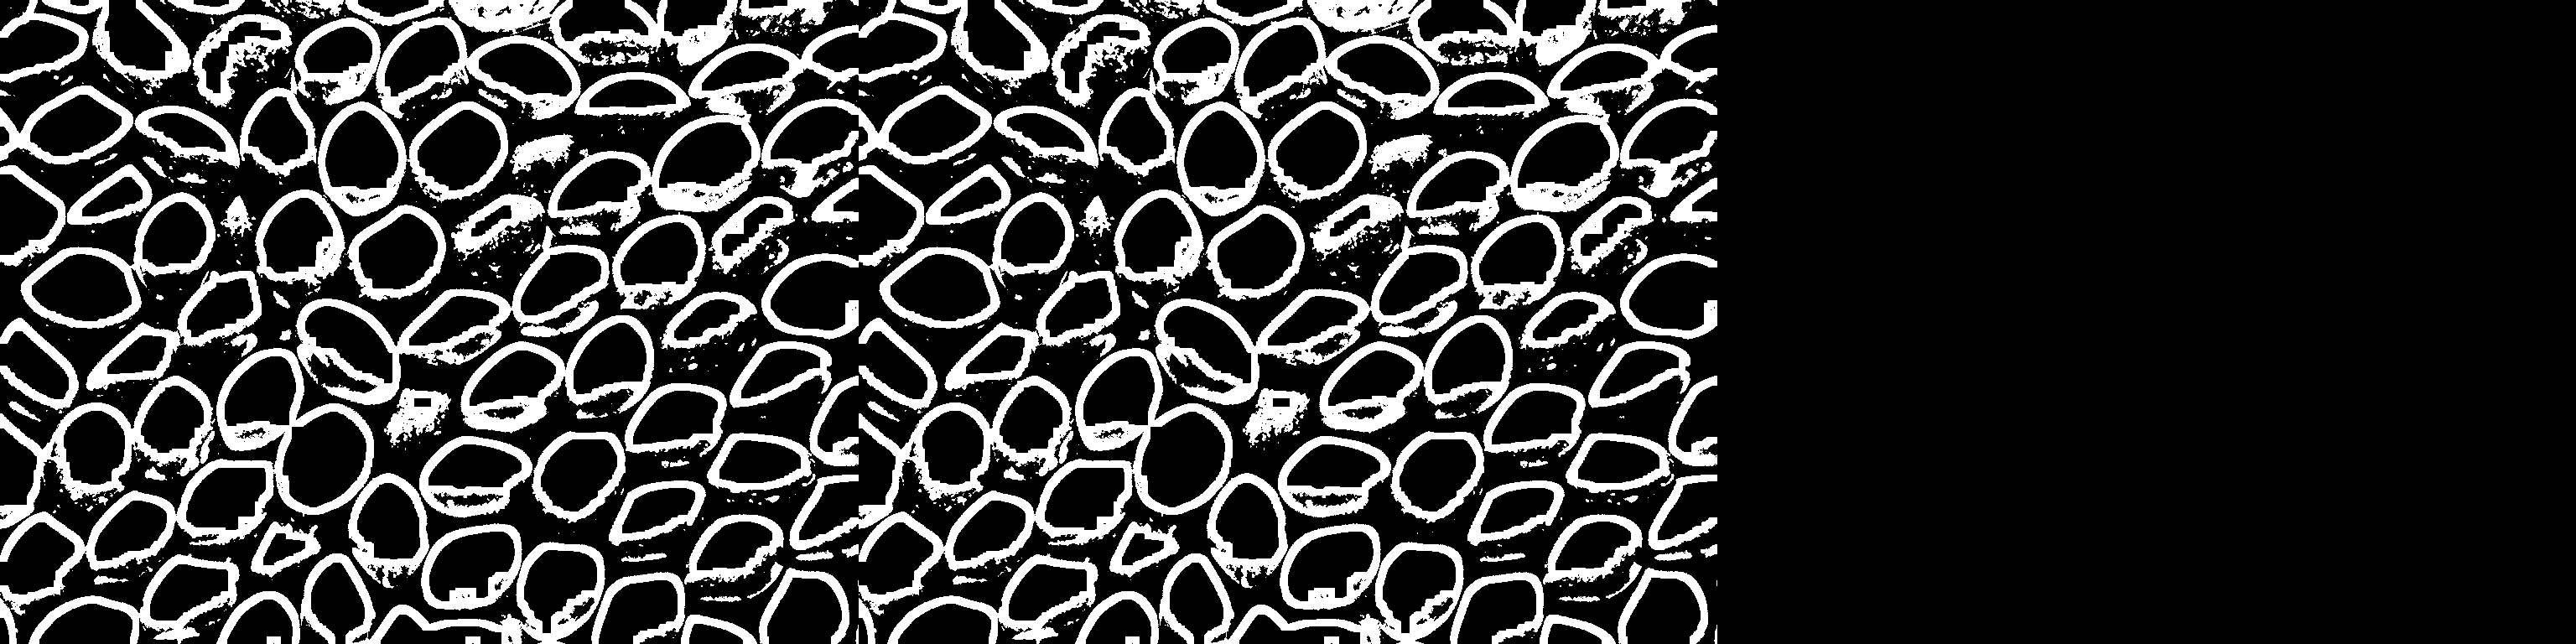

In [11]:

skittles = cv2.adaptiveThreshold(img_gs, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 201, 20)


skittles1 = cv2.morphologyEx(skittles, cv2.MORPH_OPEN, np.ones((5, 5), np.uint8), iterations = 6)
skittles1 = cv2.erode(skittles1, np.ones((5, 5), np.uint8), iterations = 4)

_, canny_inv = cv2.threshold(img_canny, 100, 255, cv2.THRESH_BINARY_INV)

diff1 = skittles - skittles1
diff2 = skittles1 - skittles
s = np.maximum(diff1, diff2)


s_clv = np.minimum(skittles1, canny_inv)


imshow(np.concatenate([img_gs, skittles1, skittles], 1))
imshow(np.concatenate([s, diff1, diff2], 1))


 Candies count: 75 <============ 



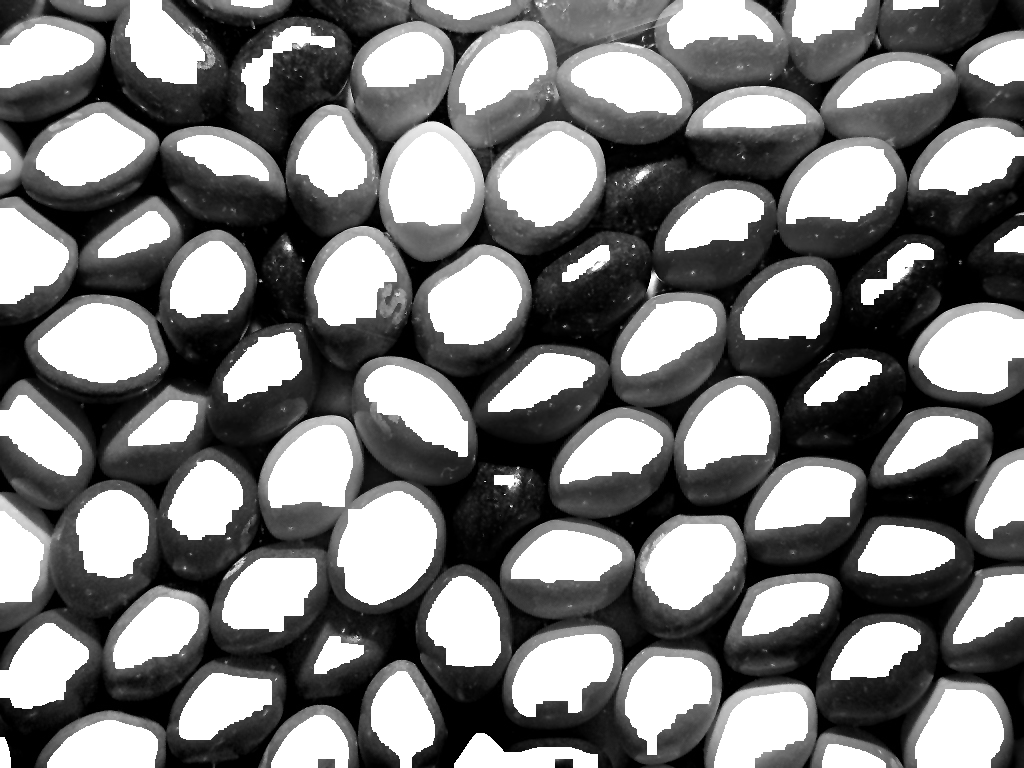

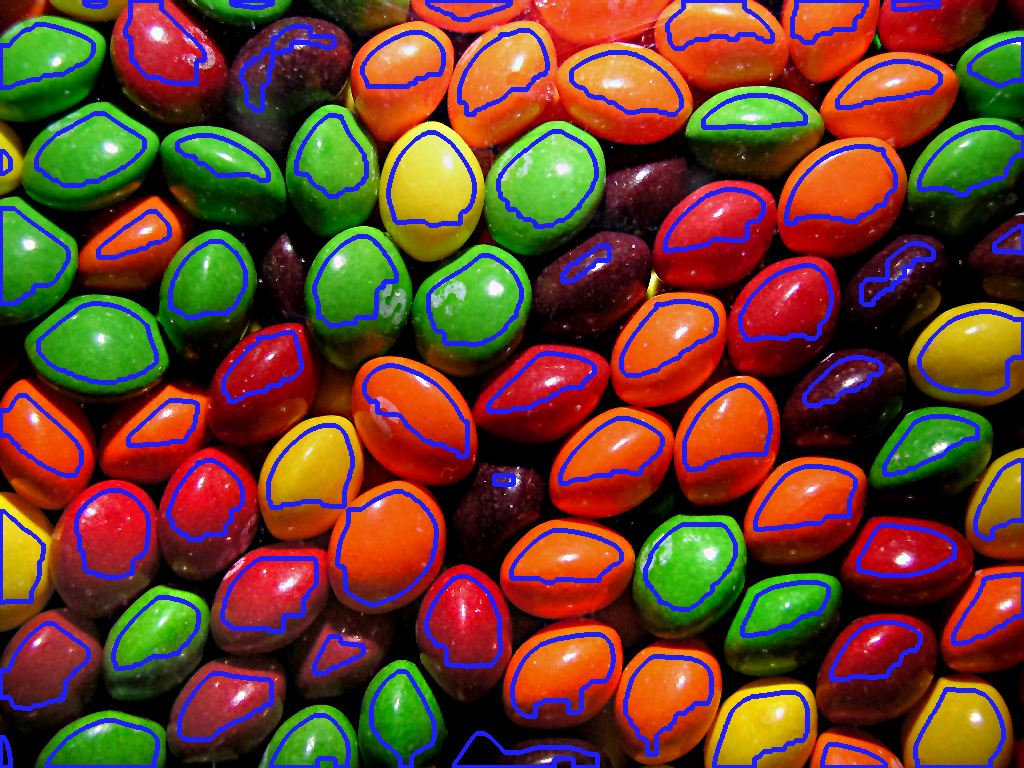

In [12]:
cnts = cv2.findContours(skittles1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("\n", "Candies count:", len(cnts[0]), "<============", "\n")

cont = img.copy()
dr = cv2.drawContours(cont, cnts[0], -1, (255,30,30), 3)


imshow(np.maximum(img_gs, skittles1))
imshow(dr)
